#Персептрон

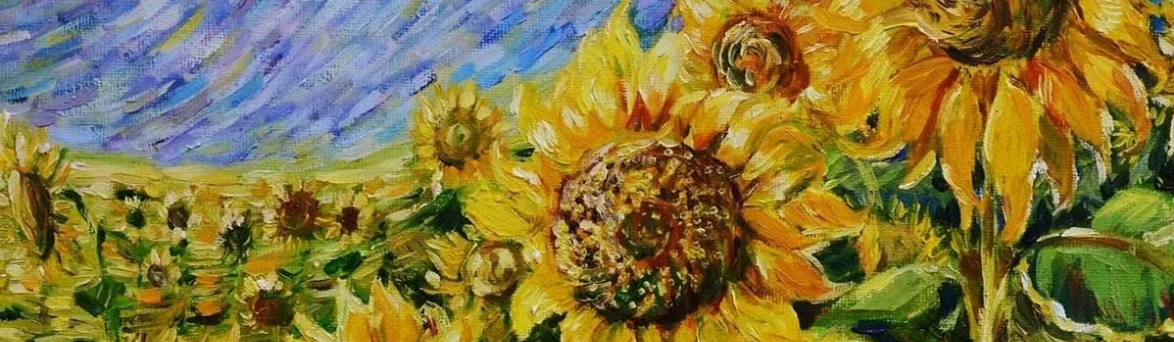

In [2]:
from sklearn.datasets import  make_blobs, make_moons, load_digits
import numpy as np
import matplotlib.pyplot as plt
import random

#Исходные данные

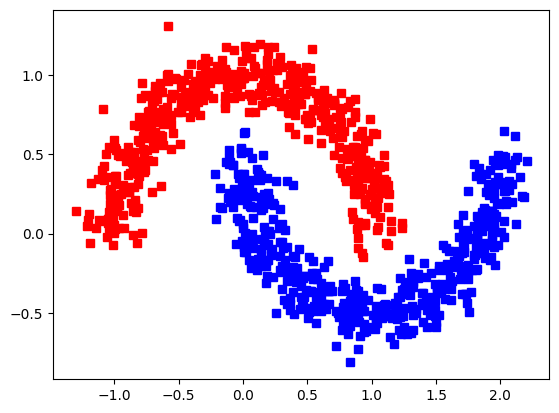

In [3]:
X, y = make_moons(n_samples=1000,noise=0.1, random_state=1)

plt.plot(X[y==0,0],X[y==0,1],'sr')
plt.plot(X[y==1,0],X[y==1,1],'sb')
plt.show()

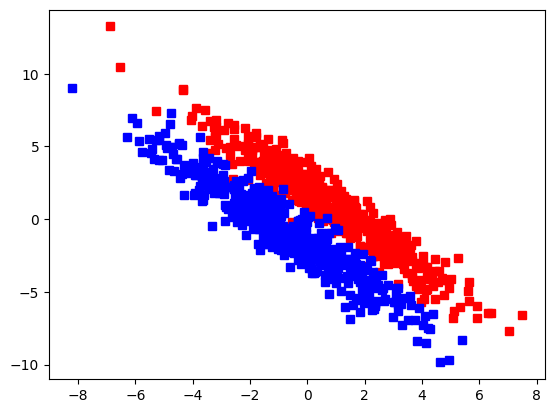

In [4]:
X, y = make_blobs(n_samples=1000, centers=[[4, 4], [-4, -4]],cluster_std=3,random_state=1)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X= np.dot(X, transformation)

plt.plot(X[y==0,0],X[y==0,1],'sr')
plt.plot(X[y==1,0],X[y==1,1],'sb')
plt.show()



#Перспетрон

In [5]:
class Neuron():
  def __init__(self,alpha=0.001, n_iters=100):
    self.alpha=alpha
    self.n_iters=n_iters
    self.W=np.array([0.,0.,0.])

  def sigmoida(self,X):
    X=np.hstack((np.ones((X.shape[0],1)),X))
    Z = X @ self.W.T
    return 1/(1+np.exp(-Z))

  def fit(self,X,y):
    W_tmp=self.W.copy()
    J=[]
    y_pred=self.predict(X)
    error = sum(abs(y_pred - y)) / len(y)
    J.append(error)
    for i in range(self.n_iters):
      indexes=np.random.randint(1,n,batch_size)
      y_pred=self.sigmoida(X[indexes,:])
      W_tmp[0]=self.W[0]+self.alpha*sum((y[indexes]-y_pred)*(1))
      W_tmp[1]=self.W[1]+self.alpha*sum((y[indexes]-y_pred)*(X[indexes, 0]))
      W_tmp[2]=self.W[2]+self.alpha*sum((y[indexes]-y_pred)*(X[indexes, 1]))
      self.W=W_tmp.copy()

      y_pred=self.predict(X)
      error = sum(abs(y_pred - y)) / len(y)
      J.append(error)
    plt.plot(J,'g')
    plt.show()

  def predict(self,X):
    X=np.hstack((np.ones((X.shape[0],1)),X))
    y_pred=np.where(np.matmul(X, self.W.T)>=0,1,0)

    return y_pred

# Тестирование

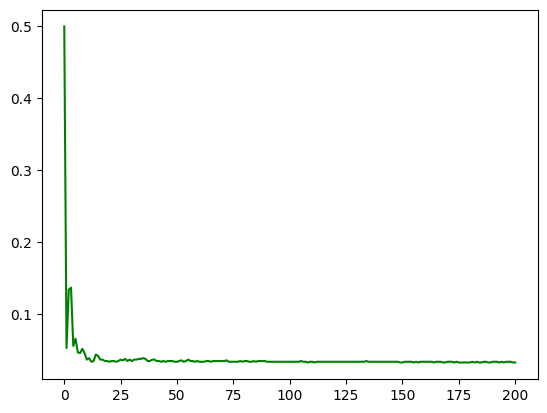

0.033


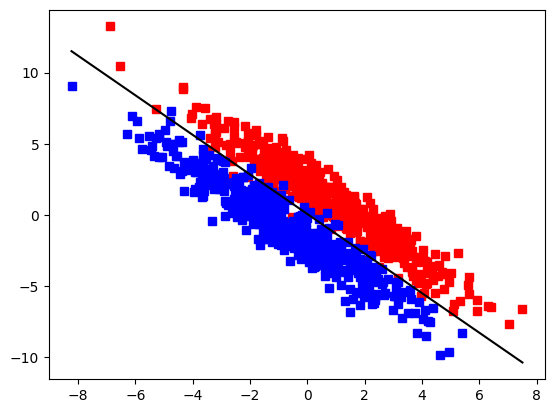

In [8]:
X, y = make_blobs(n_samples=1000, centers=[[4, 4], [-4, -4]],cluster_std=3,random_state=1)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X= np.dot(X, transformation)
class Neuron():
  def __init__(self,alpha=0.001, n_iters=100):
    self.alpha=alpha
    self.n_iters=n_iters
    self.W=np.array([0.,0.,0.])

  def sigmoida(self,X):
    X=np.hstack((np.ones((X.shape[0],1)),X))
    Z = X @ self.W.T
    return 1/(1+np.exp(-Z))

  def fit(self,X,y):
    W_tmp=self.W.copy()
    J=[]
    y_pred=self.predict(X)
    error = sum(abs(y_pred - y)) / len(y)
    J.append(error)
    for i in range(self.n_iters):
      indexes=np.random.randint(1,n,batch_size)
      y_pred=self.sigmoida(X[indexes,:])
      W_tmp[0]=self.W[0]+self.alpha*sum((y[indexes]-y_pred)*(1))
      W_tmp[1]=self.W[1]+self.alpha*sum((y[indexes]-y_pred)*(X[indexes, 0]))
      W_tmp[2]=self.W[2]+self.alpha*sum((y[indexes]-y_pred)*(X[indexes, 1]))
      self.W=W_tmp.copy()

      y_pred=self.predict(X)
      error = sum(abs(y_pred - y)) / len(y)
      J.append(error)
    plt.plot(J,'g')
    plt.show()

  def predict(self,X):
    X=np.hstack((np.ones((X.shape[0],1)),X))
    y_pred=np.where(np.matmul(X, self.W.T)>=0,1,0)

    return y_pred

n=1000
batch_size=100
neuron=Neuron(n_iters=200)
neuron.fit(X,y)
y_pred=neuron.predict(X)
error=sum(abs(y_pred-y))/len(y)
print(error)


x=[min(X[:,0]),max(X[:,0])]
plt.plot(X[y==0,0],X[y==0,1],'sr')
plt.plot(X[y==1,0],X[y==1,1],'sb')
plt.plot(x,[((-1)*neuron.W[0]-neuron.W[1]*x[0])/neuron.W[2],((-1)*neuron.W[0]-neuron.W[1]*x[1])/neuron.W[2]], 'k')

plt.show()